# Projet ft_linear_regression
Ce projet a pour but de faire comprendre le machine learning ainsi que de m'initier à différents outils comme Jupyter

In [27]:
import numpy as np
import pandas as pd


def load_data(file_path):
    data = np.loadtxt(file_path, delimiter=',', skiprows=1)
    mileage = data[:, 0]
    price = data[:, 1]
    return mileage, price


def normalize_data(data):
    mean = np.mean(data)
    std = np.std(data)
    normalized_data = (data - mean) / std
    return normalized_data, mean, std


def compute_cost(mileage, price, theta0, theta1):
    m = len(price)
    predictions = theta0 + theta1 * mileage
    cost = (1 / (2 * m)) * np.sum((predictions - price) ** 2)
    return cost


def gradient_descent(mileage, price, theta0, theta1, learning_rate, iterations):
    m = len(price)
    for _ in range(iterations):
        predictions = theta0 + theta1 * mileage
        tmp_theta0 = theta0 - learning_rate * (1 / m) * np.sum(predictions - price)
        tmp_theta1 = theta1 - learning_rate * (1 / m) * np.sum((predictions - price) * mileage)
        # Check for NaN or infinity values
        if np.isnan(tmp_theta0) or np.isnan(tmp_theta1) or np.isinf(tmp_theta0) or np.isinf(tmp_theta1):
            print("Warning: NaN or infinity values encountered during training. Consider reducing the learning rate.")
            break
        theta0, theta1 = tmp_theta0, tmp_theta1
    return theta0, theta1

mileage, price = load_data('csv/data.csv')

normalized_mileage, mileage_mean, mileage_std = normalize_data(mileage)
normalized_price, price_mean, price_std = normalize_data(price)

theta0 = 0.0
theta1 = 0.0
learning_rate = 0.01  # Reduce the learning rate
iterations = 1500

theta0, theta1 = gradient_descent(normalized_mileage, normalized_price, theta0, theta1, learning_rate, iterations)

# Ajuster les paramètres pour la normalisation
theta1 = theta1 * price_std / mileage_std
theta0 = price_mean - theta1 * mileage_mean

pd.DataFrame({"theta0": [f"{theta0:.4f}"], 'theta1': [f"{theta1:.4f}"]})

,theta0,theta1
0,8499.5990,-0.0214


In [24]:
from test import theta1, theta0
import pandas as pd

def predict_price(mileage):
    return theta0 + theta1 * mileage

data = pd.read_csv('csv/data.csv')
prices = []

for km in data['km']:
    prices.append(predict_price(km))

pd.DataFrame({"km": data['km'], 'price': prices})

,km,price
0,240000,3351.849233
1,139800,5501.034775
2,150500,5271.530930
3,185530,4520.173949
4,176000,4724.582514
5,114800,6037.258713
6,166800,4921.912923
7,89000,6590.641817
8,144500,5400.224675
9,84000,6697.886604


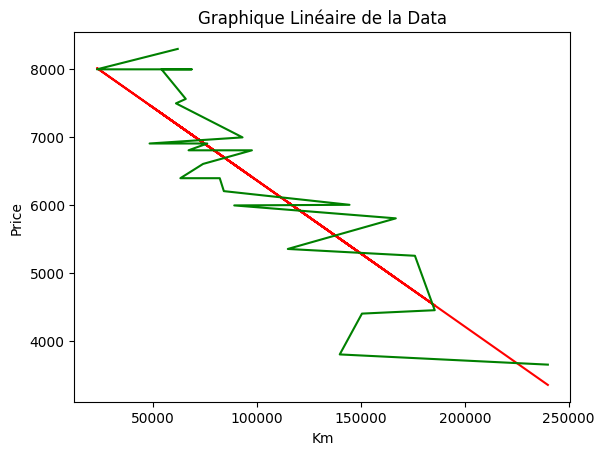

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('csv/data.csv')

plt.plot(data['km'], prices, 'r')
plt.plot(data['km'], data['price'], 'g')

plt.xlabel('Km')
plt.ylabel('Price')
plt.title('Graphique Linéaire de la Data')

plt.show()